In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the CSV file
url = 'https://raw.githubusercontent.com/aishwaryam9/E-Commerce-Clothing-Reviews-/master/Womens_Clothing_E_Commerce_Reviews.csv'
df = pd.read_csv(url)

In [5]:
# Dropping the extra, useless columns
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
# Dropping rows with no Rating
df = df.dropna(subset = ["Rating"])

In [7]:
#Determing the total count of null values, of each column of the dataset.
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
# Dropping rows with no Review Text
df = df.dropna(subset = ["Review Text"])

In [9]:
# Dropping rows with no Division Name
df = df.dropna(subset = ["Division Name"])

In [10]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [11]:
# Plotting count of Recommended IND (0/1) with Rating
df.groupby(['Rating', 'Recommended IND'])['Recommended IND'].count()

Rating  Recommended IND
1       0                    806
        1                     15
2       0                   1455
        1                     94
3       0                   1653
        1                   1170
4       0                    164
        1                   4744
5       0                     23
        1                  12504
Name: Recommended IND, dtype: int64

In [12]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,919.695908,43.282880,4.183092,0.818764,2.631784
std,201.683804,12.328176,1.115911,0.385222,5.787520
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [13]:
df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [14]:
df.columns = df.columns.str.replace(' ', '_')

In [15]:
df.dropna(how='any', inplace=True)

In [16]:
#Adding 'Rating Class' column to convert the 'Rating' into 2 classes: Good (Rating > 3) or Bad (Rating <=3)
df['Rating_Class'] = df['Rating'].apply(lambda x: 'Bad' if x <= 3 else 'Good')

In [17]:
df = df[['Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating', 'Rating_Class', 'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name', 'Department_Name', 'Class_Name']]
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Rating_Class,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Bad,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Good,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Good,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,Bad,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,Good,1,1,General Petite,Tops,Knits


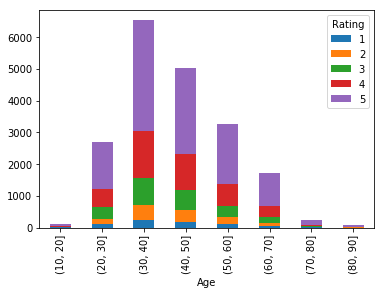

In [18]:
# Plotting count of Ratings among Age Groups
df.groupby(['Rating', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

<Figure size 1080x1080 with 0 Axes>

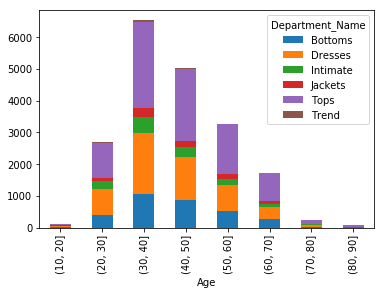

In [19]:
# Plotting count of Reviews of Departments among Age Groups
plt.figure(figsize=(15,15))
df.groupby(['Department_Name', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

[Text(0.5, 1.0, 'Rating VS Count')]

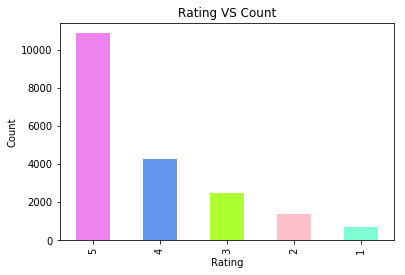

In [20]:
# Visualization graph between Rating and Count.
VisRtng_Cnt=df['Rating'].value_counts().plot(kind='bar',color=['violet','cornflowerblue','greenyellow', 'pink', 'aquamarine'])
VisRtng_Cnt.set(xlabel='Rating',ylabel='Count')
VisRtng_Cnt.set(title='Rating VS Count')

[Text(0.5, 1.0, 'Rating_Class VS Count')]

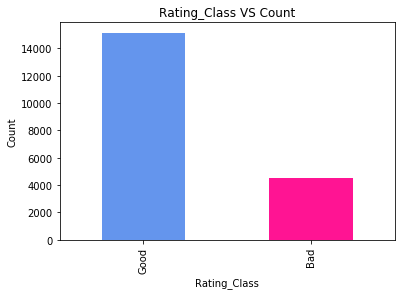

In [21]:
# Visualization graph between column Rating Class and Count.
VisRtngCl_Cnt=df['Rating_Class'].value_counts().plot(kind='bar',color=['cornflowerblue','deeppink'])
VisRtngCl_Cnt.set(xlabel='Rating_Class',ylabel='Count')
VisRtngCl_Cnt.set(title='Rating_Class VS Count')

[Text(0.5, 1.0, 'Recommended_IND VS Count')]

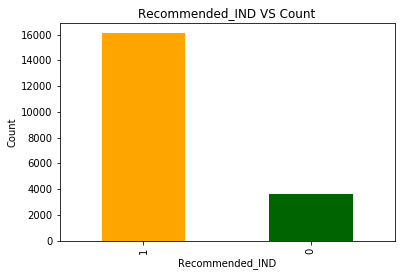

In [22]:
# Visualization graph between column Recommended IND and Count.
VisRcmndInd_Cnt=df['Recommended_IND'].value_counts().plot(kind='bar',color=['orange','darkgreen'])
VisRcmndInd_Cnt.set(xlabel='Recommended_IND',ylabel='Count')
VisRcmndInd_Cnt.set(title='Recommended_IND VS Count')

[Text(0.5, 1.0, 'Age VS Recommended_IND')]

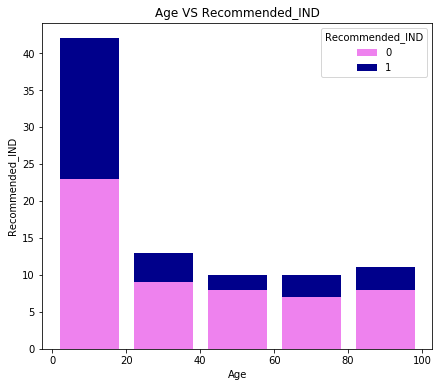

In [24]:
# Visualization graph between column Age and Recommended IND.
VisAge_RcmndInd = df.groupby(['Age','Recommended_IND']).size().unstack().plot(figsize=(7,6), kind='hist',bins=[0,20,40,60,80,100], rwidth=0.8 ,color=['violet','darkblue'] ,  stacked=True)
VisAge_RcmndInd.set(xlabel='Age',ylabel = 'Recommended_IND')
VisAge_RcmndInd.set(title='Age VS Recommended_IND')

In [25]:
# Clothing ID's with highest review counts-
df.groupby(['Clothing_ID'])['Clothing_ID'].agg(counts = 'count').reset_index().sort_values(by = 'counts', ascending = False)

,Clothing_ID,counts
974,1078,871
764,862,658
990,1094,651
977,1081,487
732,829,452
...,...,...
682,778,1
680,776,1
679,775,1
356,405,1


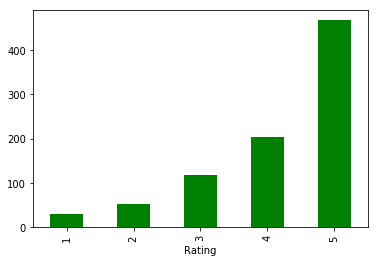

In [28]:
# Plotting graph between Clothing_ID and Rating
df[df.Clothing_ID == 1078].groupby(['Rating'])['Rating'].count().plot(kind = 'bar', color = 'green')

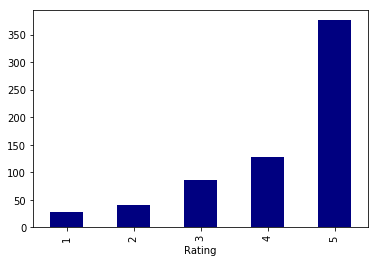

In [29]:
df[df.Clothing_ID == 862].groupby(['Rating'])['Rating'].count().plot(kind = 'bar', color = 'navy')

In [30]:
# Products with their good reviews count-
df[df.Rating_Class == 'Good'].groupby(['Clothing_ID'])['Clothing_ID'].agg(counts = 'count').reset_index().sort_values(by = 'counts', ascending = False)

,Clothing_ID,counts
870,1078,671
671,862,503
886,1094,497
873,1081,398
681,872,369
...,...,...
376,494,1
377,495,1
378,497,1
380,499,1


In [31]:
# Products with their bad reviews count-
df[df.Rating_Class == 'Bad'].groupby(['Clothing_ID'])['Clothing_ID'].agg(counts = 'count').reset_index().sort_values(by = 'counts', ascending = False)

,Clothing_ID,counts
459,1078,200
282,862,155
475,1094,154
288,868,123
255,829,105
...,...,...
173,593,1
171,586,1
168,574,1
165,570,1


In [32]:
# Correlation between variables
df.corr(method = 'pearson')

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count
Clothing_ID,1.000000,0.012547,-0.013529,-0.012949,0.041300
Age,0.012547,1.000000,0.034910,0.035407,0.041167
Rating,-0.013529,0.034910,1.000000,0.793145,-0.056659
Recommended_IND,-0.012949,0.035407,0.793145,1.000000,-0.059452
Positive_Feedback_Count,0.041300,0.041167,-0.056659,-0.059452,1.000000


In [33]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
pip install -U textblob

Requirement already up-to-date: textblob in c:\users\aishw\appdata\local\programs\python\python35-32\lib\site-packages (0.15.3)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [35]:
#count of word in each sentence of Review text
df['word_count'] = df['Review_Text'].apply(lambda x: len(str(x).split(" ")))
df[['Review_Text','word_count']].head(15)

,Review_Text,word_count
2,I had such high hopes for this dress and reall...,98
3,"I love, love, love this jumpsuit. it's fun, fl...",22
4,This shirt is very flattering to all due to th...,36
5,"I love tracy reese dresses, but this one is no...",98
6,I aded this in my basket at hte last mintue to...,101
7,"I ordered this in carbon for store pick up, an...",97
8,I love this dress. i usually get an xs but it ...,34
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",72
10,Dress runs small esp where the zipper area run...,66
12,More and more i find myself reliant on the rev...,91


In [36]:
# Remove HTML tags
def cleanhtml(sentence):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  return cleantext

In [37]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Rating_Class,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,word_count
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Bad,0,0,General,Dresses,Dresses,98
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Good,1,0,General Petite,Bottoms,Pants,22
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Good,1,6,General,Tops,Blouses,36
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,Bad,0,4,General,Dresses,Dresses,98
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,Good,1,1,General Petite,Tops,Knits,101


In [39]:
#Remove hashtags
df['hastags'] = df['Review_Text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['Review_Text','hastags']].head()

,Review_Text,hastags
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0
5,"I love tracy reese dresses, but this one is no...",0
6,I aded this in my basket at hte last mintue to...,0


In [40]:
#convert words into lowercase
df['Review_Text'] = df['Review_Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Review_Text'].head()

2    i had such high hopes for this dress and reall...
3    i love, love, love this jumpsuit. it's fun, fl...
4    this shirt is very flattering to all due to th...
5    i love tracy reese dresses, but this one is no...
6    i aded this in my basket at hte last mintue to...
Name: Review_Text, dtype: object

In [41]:
#Removing Punctuation
df['Review_Text'] = df['Review_Text'].str.replace('[^\w\s]','')
df['Review_Text'].head()

2    i had such high hopes for this dress and reall...
3    i love love love this jumpsuit its fun flirty ...
4    this shirt is very flattering to all due to th...
5    i love tracy reese dresses but this one is not...
6    i aded this in my basket at hte last mintue to...
Name: Review_Text, dtype: object

In [42]:
stop = stopwords.words('english')
df['Review_Text'] = df['Review_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Review_Text'].head()

2    high hopes dress really wanted work initially ...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
5    love tracy reese dresses one petite 5 feet tal...
6    aded basket hte last mintue see would look lik...
Name: Review_Text, dtype: object

In [43]:
#Count of frequently occuring words
freq = pd.Series(' '.join(df['Review_Text']).split()).value_counts()[:10]
freq

dress    9266
size     7791
love     7698
fit      6528
top      6485
like     6248
wear     5699
im       5332
great    5272
would    4469
dtype: int64

In [44]:
#Count of rare occuring words in the dataset
freq = pd.Series(' '.join(df['Review_Text']).split()).value_counts()[-10:]
freq

savannah           1
cottoni            1
addtl              1
anytimeanywhere    1
dow                1
glorified          1
wellnot            1
bigam              1
armchest           1
angela             1
dtype: int64

In [45]:
#Rare words removal
freq = list(freq.index)
df['Review_Text'] = df['Review_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Review_Text'].head()

2    high hopes dress really wanted work initially ...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
5    love tracy reese dresses one petite 5 feet tal...
6    aded basket hte last mintue see would look lik...
Name: Review_Text, dtype: object

In [46]:
#Spelling correction of the words achieved through textblob library
from textblob import TextBlob
df['Review_Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

2    high hopes dress really wanted work initially ...
3    love love love jumpsuit fun flirt fabulous eve...
4    shirt flattering due adjustable front tie perf...
5    love trace geese dresses one petite 5 feet tal...
6    added basket the last minute see would look li...
Name: Review_Text, dtype: object

In [47]:
#Text Polarity
df['Polarity'] = df['Review_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head(5)

,Clothing_ID,Age,Title,Review_Text,Rating,Rating_Class,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,word_count,stopwords,hastags,Polarity
2,1077,60,Some major design flaws,high hopes dress really wanted work initially ...,3,Bad,0,0,General,Dresses,Dresses,98,45,0,0.082300
3,1049,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,Good,1,0,General Petite,Bottoms,Pants,22,6,0,0.500000
4,847,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,Good,1,6,General,Tops,Blouses,36,19,0,0.458333
5,1080,49,Not for the very petite,love tracy reese dresses one petite 5 feet tal...,2,Bad,0,4,General,Dresses,Dresses,98,55,0,0.150000
6,858,39,Cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,5,Good,1,1,General Petite,Tops,Knits,101,47,0,0.075625


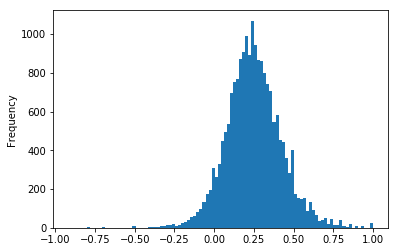

In [48]:
df['Polarity'].plot(kind='hist', bins=100)

In [49]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

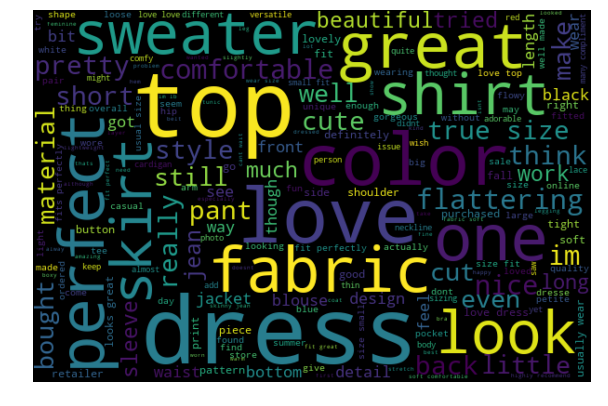

In [50]:
# WordCloud plotting for 'Good' rating
from wordcloud import WordCloud
good_words = ' '.join([text for text in df[df.Rating_Class == 'Good']['Review_Text']])
wordcloud = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 100).generate(good_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()


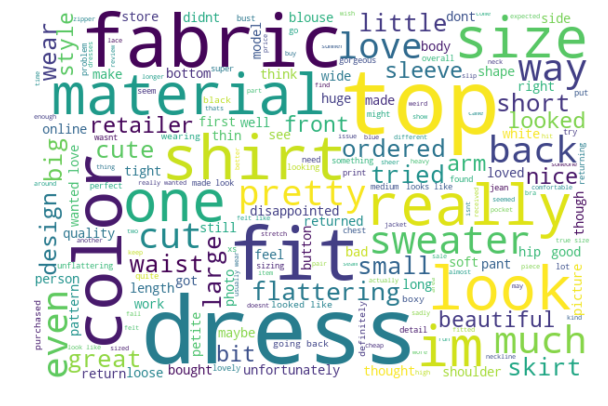

In [51]:
# WordCloud Plotting for 'Bad' Rating
from wordcloud import WordCloud
bad_words = ' '.join([text for text in df[df.Rating_Class == 'Bad']['Review_Text']])
wordcloud = WordCloud(width = 600, height = 400, random_state = 21,background_color="white", max_font_size = 100).generate(bad_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

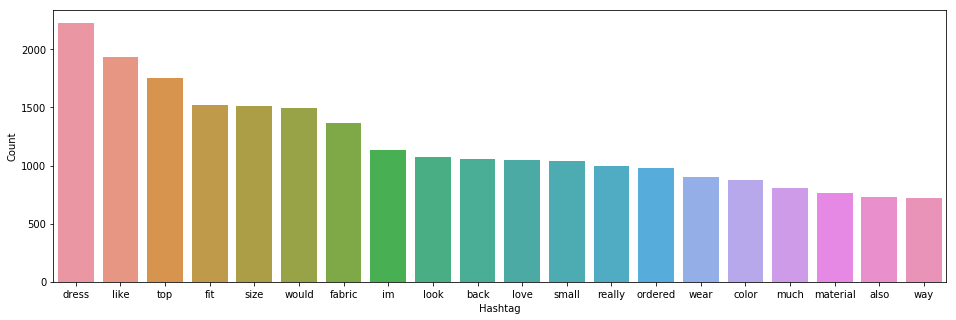

In [52]:
# Count of words used in Reviews with 'Good' Rating
good_words = ' '.join([text for text in df[df.Rating_Class == 'Bad']['Review_Text']])
a = nltk.FreqDist(good_words.split(" "))
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
d = d.nlargest(columns = 'Count', n = 20)
plt.figure(figsize = (16,5))
colors = ['b', 'g', 'r']
ax = sns.barplot(data = d, x = "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [53]:
tokenizer=RegexpTokenizer(r'\w+')

In [54]:
#Tokenization of each sentence occurs splitting it into words
df['Review_Text']= df['Review_Text'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [55]:
df['Review_Text'].head()

2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
5    [love, tracy, reese, dresses, one, petite, 5, ...
6    [aded, basket, hte, last, mintue, see, would, ...
Name: Review_Text, dtype: object

In [56]:
lemmatizer = WordNetLemmatizer()

In [57]:
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [58]:
#Since lemmatization gives more accurate results than stemming,Executed using it.
df['Review_Text'].apply(lambda x: word_lemmatizer(x))

2        [high, hope, dress, really, wanted, work, init...
3        [love, love, love, jumpsuit, fun, flirty, fabu...
4        [shirt, flattering, due, adjustable, front, ti...
5        [love, tracy, reese, dress, one, petite, 5, fo...
6        [aded, basket, hte, last, mintue, see, would, ...
                               ...                        
23481    [happy, snag, dress, great, price, easy, slip,...
23482    [reminds, maternity, clothes, soft, stretchy, ...
23483    [fit, well, top, see, never, would, worked, im...
23484    [bought, dress, wedding, summer, cute, unfortu...
23485    [dress, lovely, platinum, feminine, fit, perfe...
Name: Review_Text, Length: 19662, dtype: object

In [59]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Rating_Class,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,word_count,stopwords,hastags,Polarity
2,1077,60,Some major design flaws,"[high, hopes, dress, really, wanted, work, ini...",3,Bad,0,0,General,Dresses,Dresses,98,45,0,0.082300
3,1049,50,My favorite buy!,"[love, love, love, jumpsuit, fun, flirty, fabu...",5,Good,1,0,General Petite,Bottoms,Pants,22,6,0,0.500000
4,847,47,Flattering shirt,"[shirt, flattering, due, adjustable, front, ti...",5,Good,1,6,General,Tops,Blouses,36,19,0,0.458333
5,1080,49,Not for the very petite,"[love, tracy, reese, dresses, one, petite, 5, ...",2,Bad,0,4,General,Dresses,Dresses,98,55,0,0.150000
6,858,39,Cagrcoal shimmer fun,"[aded, basket, hte, last, mintue, see, would, ...",5,Good,1,1,General Petite,Tops,Knits,101,47,0,0.075625


In [60]:
def text_vectorizing_process(sentence_string):
    return [word for word in sentence_string.split()]

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
bow_transformer = CountVectorizer(text_vectorizing_process)

In [63]:
#Vectorization.This variable I made only to check the vocabularly length
df=df.dropna(axis=0,how='any')
X_review=df['Rating_Class']
y=df['Recommended_IND']

In [64]:
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [65]:
#CountVectorizer to convert the text collection into a matrix of token counts.
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [66]:
print(len(bow_transformer.vocabulary_))

2


In [67]:
#the above number is the size of the vocabulary stored in the vectoriser (based on X_review)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
#Vectorization
X_predict_recommend=df['Review_Text']
y_recommend=df['Rating_Class']

bow_transformer=CountVectorizer(analyzer=text_process).fit(X_predict_recommend)

X_predict_recommend = bow_transformer.transform(X_predict_recommend)
#Training Data and Test Data
X_train, X_test, y_train, y_test = train_test_split(X_predict_recommend, y_recommend, test_size=0.2, random_state=101)


In [70]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

#Testing the model
predict_recommendation=nb.predict(X_test)

In [71]:
#Calculation of accuracy score
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,predict_recommendation)
print(acc)

0.7854055428426138


In [72]:
#Calculation of confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict_recommendation)
print(cm)


[[   0  844]
 [   0 3089]]


In [73]:
#Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, max_depth=5,  criterion = 'entropy', class_weight='balanced',
                                    random_state = 3)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=3, verbose=0, warm_start=False)

In [74]:
#Testing the model
predict_recommendation=classifier.predict(X_test)

In [75]:
#Calculation of accuracy score
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,predict_recommendation)
print(acc)

0.7854055428426138


In [76]:
#Calculation of confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict_recommendation)
print(cm)

[[   0  844]
 [   0 3089]]


In [77]:
#KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 1)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

In [ ]:
#Testing the model
predict_recommendation=classifier1.predict(X_test)

In [ ]:
#Calculation of accuracy score
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,predict_recommendation)
print(acc)

In [ ]:
#Calculation of confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict_recommendation)
print(cm)

In [ ]:
#SVM algorithm
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'rbf', random_state = 101)
classifier1.fit(X_train, y_train)

In [ ]:
#Testing the model
predict_recommendation=classifier1.predict(X_test)

In [ ]:
#Calculation of accuracy score
from sklearn.metrics import accuracy_score
acc1=accuracy_score(y_test,predict_recommendation)
print(acc1)

In [ ]:
#Calculation of confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict_recommendation)
print(cm)

In [ ]:
#logistics regression algorithm
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=101)
classifier.fit(X_train, y_train)

In [ ]:
#Testing the model
predict_recommendation=classifier.predict(X_test)

In [ ]:
#Calculation of accuracy score
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,predict_recommendation)
print(acc)

In [ ]:
#Calculation of confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict_recommendation)
print(cm)

In [ ]:
#linear svm
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'linear', random_state = 101)
classifier1.fit(X_train, y_train)

In [ ]:
predict_recommendation=classifier1.predict(X_test)

In [ ]:
#Calculation of accuracy score
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,predict_recommendation)
print(acc)